In [23]:
from sklearn.datasets import make_classification 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import random
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")

In [18]:
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)

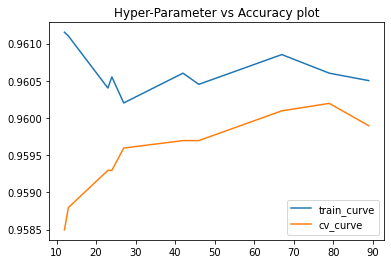

In [19]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    params=[]
    params=random.sample(range(param_range[0],param_range[1]),10)
    params=sorted(params)
    groupx1,groupx2,groupx3=np.array_split(x,folds)
    groupy1,groupy2,groupy3=np.array_split(y,folds)
    train_scores=[]
    test_scores=[]
    for i in params:
        train_fold_scores=[]
        test_fold_scores=[]
        for j in range(folds):
            test_indices=range(j*(len(x_train)//folds),(j+1)*(len(x_train)//folds))
            train_indices=list(set(list(range(0,len(x_train))))-set(test_indices))
            X_train=x_train[train_indices]
            Y_train=y_train[train_indices]
            X_test=x_train[test_indices]
            Y_test=y_train[test_indices]
            knn=KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
            knn.fit(X_train,Y_train)
            y_predicted=knn.predict(X_test)
            test_fold_scores.append(accuracy_score(Y_test,y_predicted))
            y_predicted=knn.predict(X_train)
            train_fold_scores.append(accuracy_score(Y_train,y_predicted))
        test_scores.append(np.mean(np.array(test_fold_scores)))
        train_scores.append(np.mean(np.array(train_fold_scores)))
    return train_scores,test_scores,params        
train_scores,cv_scores,para=RandomSearchCV(x,y,KNeighborsClassifier,(1,100),3)
plt.plot(para,train_scores,label='train_curve')
plt.plot(para,cv_scores,label='cv_curve')
plt.title('Hyper-Parameter vs Accuracy plot')
plt.legend()
plt.show()


        
        


In [20]:
print(para)

[12, 13, 23, 24, 27, 42, 46, 67, 79, 89]


In [ ]:
best_k=79

In [21]:
def knn_compare(x,y,k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    plot_decision_regions(x,y,clf=knn,legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Knn with K='+ str(k))
    plt.show()

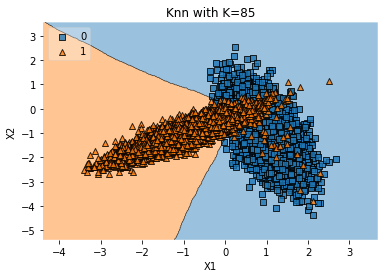

In [24]:
knn_compare(x,y,best_k)